In [22]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Lagrange2D testing script

Load all data output by test_Lagrange2D.cpp routine:

In [23]:
a = loadtxt('a.txt')
b = loadtxt('b.txt')
f = loadtxt('ftrue.txt')
p10 = loadtxt('p10.txt')
p20 = loadtxt('p20.txt')

Plot $f(x,y)$ first

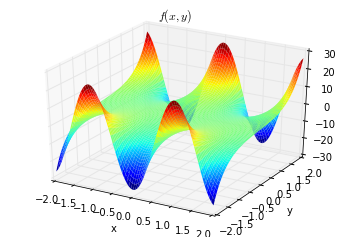

In [24]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = meshgrid(b, a)
surf = ax.plot_surface(X, Y, f, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$f(x,y)$')

Now plot both $p_{10}(x,y)$ and $p_{20}(x,y)$

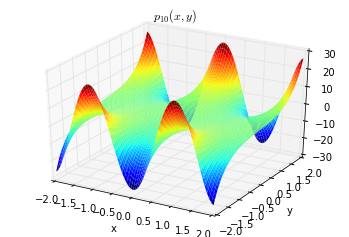

In [25]:
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, p10, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$p_{10}(x,y)$')

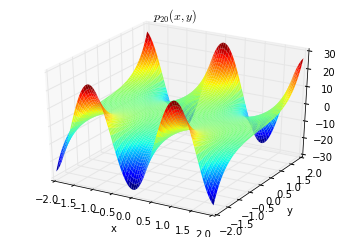

In [26]:
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, p20, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$p_{20}(x,y)$')

Now plot the error in $p_{10}(x,y)$

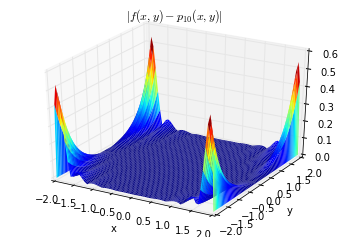

In [27]:
e10 = abs(f-p10)
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, e10, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$|f(x,y) - p_{10}(x,y)|$')

Now plot the error in $p_{20}(x,y)$

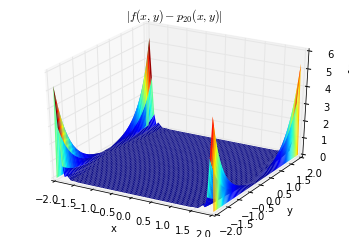

In [28]:
e20 = abs(f-p20)
fig = figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = meshgrid(b, a)
surf = ax.plot_surface(X, Y, e20, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$|f(x,y) - p_{20}(x,y)|$')

Now check the max error for each, and compare against a known tolerance for these functions over these intervals with this many nodes

In [29]:
e10tol = 0.058
e20tol = 3.7e-8
e10norm = sqrt(sum(sum(e10**2))/size(e10))
e20norm = sqrt(sum(sum(e20**2))/size(e20))
if (e10norm > e10tol):
    print ('p10 faulure!  ||e10|| = ', e10norm, ' is above tolerance of ',e10tol)
else:
    print ('p10 success!  ||e10|| = ', e10norm, ' is below tolerance of ',e10tol)
if (e20norm > e20tol):
    print ('p20 failure!  ||e20|| = ', e20norm, ' is above tolerance of ',e20tol)
else:
    print ('p20 success!  ||e20|| = ', e20norm, ' is below tolerance of ',e20tol)

p10 success!  ||e10|| =  0.0575277609593  is below tolerance of  0.058
p20 success!  ||e20|| =  3.69239841116e-08  is below tolerance of  3.7e-08
